# PISA 2012 Dataset

## by John S. Rajeski, Ed.D.

### Preliminary Wrangling

The Programme for International Student Assessment (PISA), is a global, educational programme within the Organization for Economic Cooperation and Development (OECD). Once every three years, PISA tests 15-year-old students in mathematics, reading and science in order to determine their level of mastery in these subjects. Globally, students are assessed at this age to measure their overall readiness for real-life situations in the adult world. This age is selected because in most countries students can decide whether or not they want to continue pusuing their education (therefore needing to be equipped with these three core skills for adult life). Finally, PISA publishes the global, test-results one year after the students were tested in order to assist national governments with how they shape their education policy.

In [2]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
sb.set()

# General dataset check 
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

Load the PISA 2012 dataset and display some of this Dataset's properties by using Pandas to read the csv-file.

In [ ]:
# Read the CSV
df = pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory = False)

In [ ]:
df.describe()

In [ ]:
df.head(5)

In [12]:
df.shape

(485490, 636)

In [29]:
df.tail(5)

,CNT,ST03Q02,ST04Q01,AGE
485485,Vietnam,1996,Female,15.83
485486,Vietnam,1996,Male,16.17
485487,Vietnam,1996,Male,15.83
485488,Vietnam,1996,Male,15.83
485489,Vietnam,1996,Female,15.33


### What is the structure of your dataset?

This is the largest dataset in all of my Udacity coursework. With nearly 500,000 entries and 636 columns there is a lot of data herein!

### What is/are the main feature(s) of interest in your dataset?

As the saying goes, "from soup to nuts" this dataset covers a wide-range of factors (which may or may not have a positive and/or negative impact on any given student) from age, country and gender to the respective Pisa-scores achieved in math, reading and science to assessing individual beliefs regarding their career/learning motivations to their own attitudes. All told, it is robust and comprehensive thereby allowing for a myriad of ways to conduct further data analysis.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Age and country are two factors as areas of interest.

Given the vast scope of options, narrowing the possible categories for further analysis down to age and country (focused on the overall math, reading and science scores) is a main part of the core of what this dataset offers.

### Begin a preliminary assessment regarding the overall PISA-score distribution for each subject (Math, Reading and Science) in order to determine how these respective scores are distributed, e.g., some mean measurements and/or the standard deviation of the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In sum, the biggest transformation required is reducing the areas of analysis down to a manageable number of columns as opposed to leaving it as is (at 636 columns!) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The main operations performed were (as mentioned above) reducing the columns down for analysis to age, country, gender, math, reading and science. By doing so, the focus will be on rendering, viewable DataFrames whereas deeper analysis can be conducted therein.

In [ ]:
# Selecting and defining which columns for this data analysis
df = df[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',]]

In [ ]:
# Confirm condensed DataFrame columns and their respective data
df.describe()

In [16]:
# Re-test to check the viewability of this DataFrame
df.head(5)

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [ ]:
# Re-test to check the viewability of this DataFrame
df.info()

In [26]:
# Conduct some basic data-wrangling; replace the overall student's mean-age for NaN ages listed
df.loc[np.isfinite(df['AGE']) == False, 'AGE'] = df['AGE'].mean()

In [27]:
for column in df.columns:
    if (df[column].isna().sum() > 0):
        print((column) + '  ' + str(df[column].isna().sum()))

In [ ]:
# Conduct some more, basic data-wrangling; combine individual categories/rename for easier data analysis
df['Math_Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Reading_Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Science_Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

In [ ]:
# As additional data-wrangling step, remove these columns based on the previous consolidation 
df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [ ]:
# Re-test to check the viewability of this DataFrame
df.head(5)

In [ ]:
# Re-test to check the viewability of this DataFrame
df.info()

In [19]:
# Re-test to check the viewability of this DataFrame
df.shape

(485490, 7)

In [21]:
# Determine the overall age-range within this DataFrame
df['AGE'].value_counts()

15.580000    42762
15.670000    42353
15.750000    41664
15.830000    41402
15.920000    41084
16.000000    41049
15.420000    40437
15.500000    40291
16.080000    39313
16.170000    38356
15.330000    28354
16.250000    26139
15.250000    11986
16.330000    10183
15.784283      116
15.170000        1
Name: AGE, dtype: int64

In [20]:
# Determine the nations represented within this DataFrame
df['CNT'].value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

In [22]:
# Confirm these three states are included in the overall total count for the USA 
df['CNT'].value_counts()[['United States of America','Florida (USA)','Massachusetts (USA)','Connecticut (USA)']].sum()

10294

In [23]:
# Check reported (binary) gender-breakdown
df['ST04Q01'].value_counts()

Female    245064
Male      240426
Name: ST04Q01, dtype: int64

##### Check the overall math, reading and science categorical value counts

In [25]:
df['Math_Score'].value_counts()

436.52438    103
453.03786    103
505.84982    103
458.95778    100
471.42078    100
429.51394    100
422.50350     99
462.22932     99
477.96386     98
453.50522     97
429.04658     97
427.80028     97
465.65664     97
436.99174     96
437.77068     96
419.38776     95
463.94298     95
417.05094     95
489.64792     95
434.73282     95
467.68188     95
471.88814     94
470.95342     94
480.14488     93
473.13444     93
445.24848     92
451.79156     92
433.25284     92
468.30504     92
481.39118     92
479.67752     92
445.56006     91
401.16062     91
420.32248     91
418.60882     91
432.78548     91
457.78938     91
457.39990     91
430.13710     91
444.31376     91
464.41034     91
415.33728     90
516.75494     90
469.70712     90
428.11186     90
461.76196     90
436.05702     89
441.50958     89
496.65836     89
454.43994     89
438.23804     89
486.22060     89
445.71584     89
524.23274     89
433.87600     88
451.94734     88
446.49478     88
454.75152     88
521.27278     

In [26]:
df['Reading_Score'].value_counts()

461.49812    68
492.63508    67
495.97118    67
444.49990    64
462.92788    63
450.51448    63
445.45306    63
464.35764    62
476.90774    62
513.28714    62
417.81106    61
460.86268    61
496.44776    61
541.56458    61
500.41932    61
467.53488    61
449.23138    61
447.04168    61
541.24686    60
498.98956    60
508.36242    60
463.24560    60
495.49460    60
445.13534    59
465.78740    59
431.58858    59
434.47558    58
496.13004    58
481.67360    58
481.83246    58
478.49636    58
475.79570    58
464.67536    57
433.22068    57
495.81232    57
466.42284    57
403.84128    57
461.02154    57
499.46614    57
493.90598    56
452.44298    56
450.53664    56
493.49874    56
459.43292    56
462.86444    56
468.47806    56
429.50352    56
480.72042    56
447.83598    56
527.26700    56
466.58170    56
502.48452    56
456.93004    55
436.71564    55
475.47798    55
434.65044    55
530.60310    55
483.26222    55
494.22370    55
392.13288    55
417.17562    55
459.65666    55
535.0512

In [27]:
df['Science_Score'].value_counts()

445.30026    146
487.07572    144
443.99478    141
474.39388    141
448.28422    139
485.77024    138
436.34838    137
465.25550    137
468.61246    134
454.62514    133
457.79560    132
496.02760    132
469.91794    130
450.33570    129
459.28758    128
459.10108    128
437.46736    128
466.74748    128
480.54830    127
525.30772    127
543.77098    127
520.64528    126
491.55166    126
445.11376    125
489.50018    125
494.53562    125
485.95674    124
478.31034    124
449.03022    124
479.42932    124
439.51884    123
545.44946    123
429.82096    122
483.90526    122
477.56434    122
417.32562    121
463.01754    121
448.47072    121
453.87914    121
436.16188    121
473.08840    121
463.57702    121
416.02014    120
455.93062    120
430.00746    120
456.49012    120
526.61320    120
545.07646    120
464.32302    119
444.92726    119
483.15926    119
518.03432    118
485.02424    118
434.29690    118
446.41924    118
473.27490    118
502.36852    118
451.64118    118
494.72212    1

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In sum, the biggest transformation required was simply reducing the areas of analysis down to a manageable number of columns as opposed to leaving it as it was originally (at 636 columns!) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The main operations performed were (as mentioned above) reducing the columns down for analysis to age, country, gender, math, reading and science. By doing so, the focus will be on rendering, viewable DataFrames whereas deeper analysis can be presented visually.

## Univariate Exploration
How are the overall, global PISA (Math, Reading and Science) results distributed?

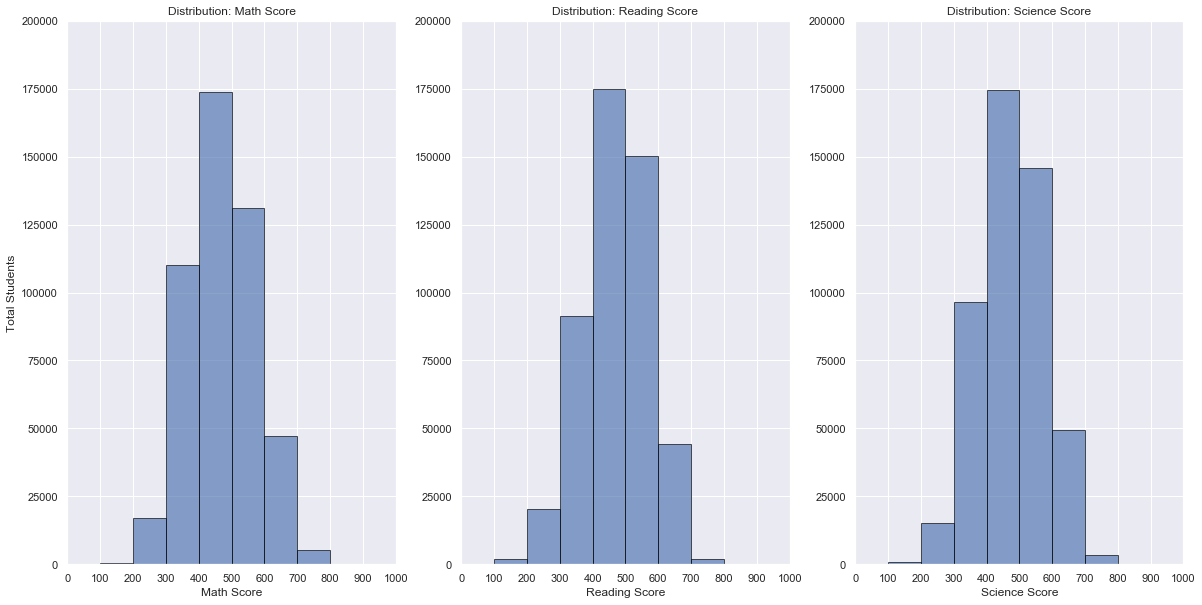

In [50]:
# Display PISA's math, reading and science results as a bell-curve 
# Plot-out the overall, global, score distribution in the Math, Reading and Science categories 
plt.suptitle("Global PISA Math, Reading and Science Score Distribution", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['Math_Score'], bins = bins_hist, ec = 'black', alpha = 0.65);

plt.xlim(0, 1000);
plt.ylim(0, 200000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Total Students');
plt.title("Distribution: Math Score");

plt.subplot(1, 3, 2)
plt.hist(df['Reading_Score'], bins = bins_hist, ec = 'black', alpha = 0.65);

plt.xlim(0, 1000);
plt.ylim(0, 200000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.ylabel('Total Students');
plt.title("Distribution: Reading Score");

plt.subplot(1, 3, 3)
plt.hist(df['Science_Score'], bins = bins_hist, ec = 'black', alpha = 0.65);

plt.xlim(0, 1000);
plt.ylim(0, 200000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.ylabel('Total Students'); 
plt.title("Distribution: Science Score");
plt.tight_layout();

While all of these graphs are skewed to the right, independently, the math graph is the closest to diplaying a bell-curve with the science and reading graphs following in that order.

The unimodal value distribution is fairly smooth and clear graphically. 

The vast, PISA-student majority fall between 300 to 600 points, with smaller portions of lower (100 to 300 points) and higher performers (600 to 800 points).

In each of these distributions, the majority fell in the middle of the scoring-range interval (400 to 500 points) seemingly demonstrating PISA's 2012 examination was balanced in the test's methodology including student preparation and question difficulty.

What is the global, distribution of the overall PISA (Math, Reading and Science) results?

In [31]:
# Set-up an inquiry regarding the highest Math, Reading and Science results by nation
top_math_score = df[df['Math_Score'] > 800]['CNT'].value_counts()
top_reading_score = df[df['Reading_Score'] > 800]['CNT'].value_counts()
top_science_score = df[df['Science_Score'] > 800]['CNT'].value_counts()

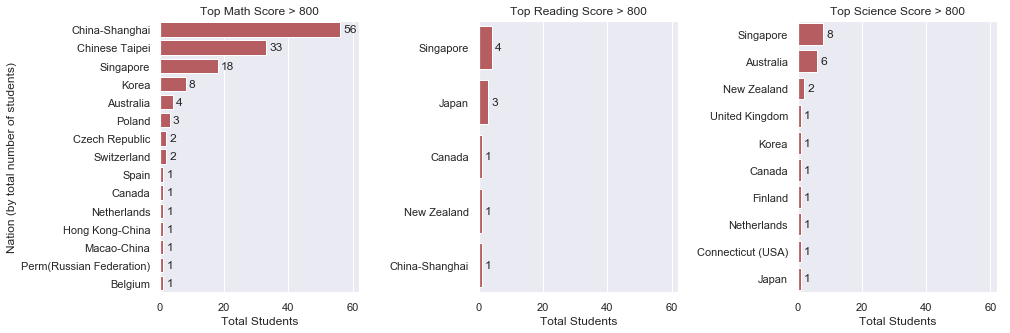

In [53]:
# Display PISA's highest Math, Reading and Science results by nation
plt.suptitle("PISA's Top Math, Reading and Science Scores by Nation", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
plt.subplots_adjust(wspace = 0.6) 
x_lim_max = top_math_score.values[0] + 6 


plt.subplot(1, 3, 1)
sb.barplot(y = top_math_score.index, x = top_math_score.values, color = sb.color_palette()[3])
plt.title('Top Math Score > 800');
plt.xlabel('Total Students');
plt.ylabel('Nation (by total number of students)');

# Post nation's high scores 
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = top_math_score[label.get_text()] + 1, s = top_math_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 2)
sb.barplot(y = top_reading_score.index, x = top_reading_score.values, color = sb.color_palette()[3])
plt.xlim(0, x_lim_max);
plt.title('Top Reading Score > 800');
plt.xlabel('Total Students');
plt.ylabel('Nation (by total number of students)');

# Post nation's high scores 
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = top_reading_score[label.get_text()] + 1, s = top_reading_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);    


plt.subplot(1, 3, 3)
sb.barplot(y = top_science_score.index, x = top_science_score.values, color = sb.color_palette()[3])
plt.xlim(0, x_lim_max);
plt.title('Top Science Score > 800');
plt.xlabel('Total Students');
plt.ylabel('Nation (by total number of students)');

# Post nation's high scores 
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = top_science_score[label.get_text()] + 1, s = top_science_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);
plt.tight_layout();

These graphs represent the global, PISA-score dominance of Asia-Pacific: Math, four out of the top five or 80% (by including Australia as an Asia-Pacific nation it is a clean-sweep); Reading, three out of the top five or 60% (by including New Zealand as an Asia-Pacific nation it is four out of five); Science, two out of the top five or 40% (by including both Australia and New Zealand it is four out of five) which, by any measure, is impressive.

Moreover, Singapore is clearly the most dominant in global math, reading and science PISA scores.

## Bivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Age and country are two areas of interest. Moreover, overall math, reading and science score ranges are also of interest as they relate globally in order to determine if certain nations or even regions (worldwide) are stronger or weaker than other regions. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

While only assessing this part of dataset visually, the influence of motivation is one area of interest with possible interdependencies.

What is the global, distribution of the overall PISA (Math, Reading and Science) results by nation?

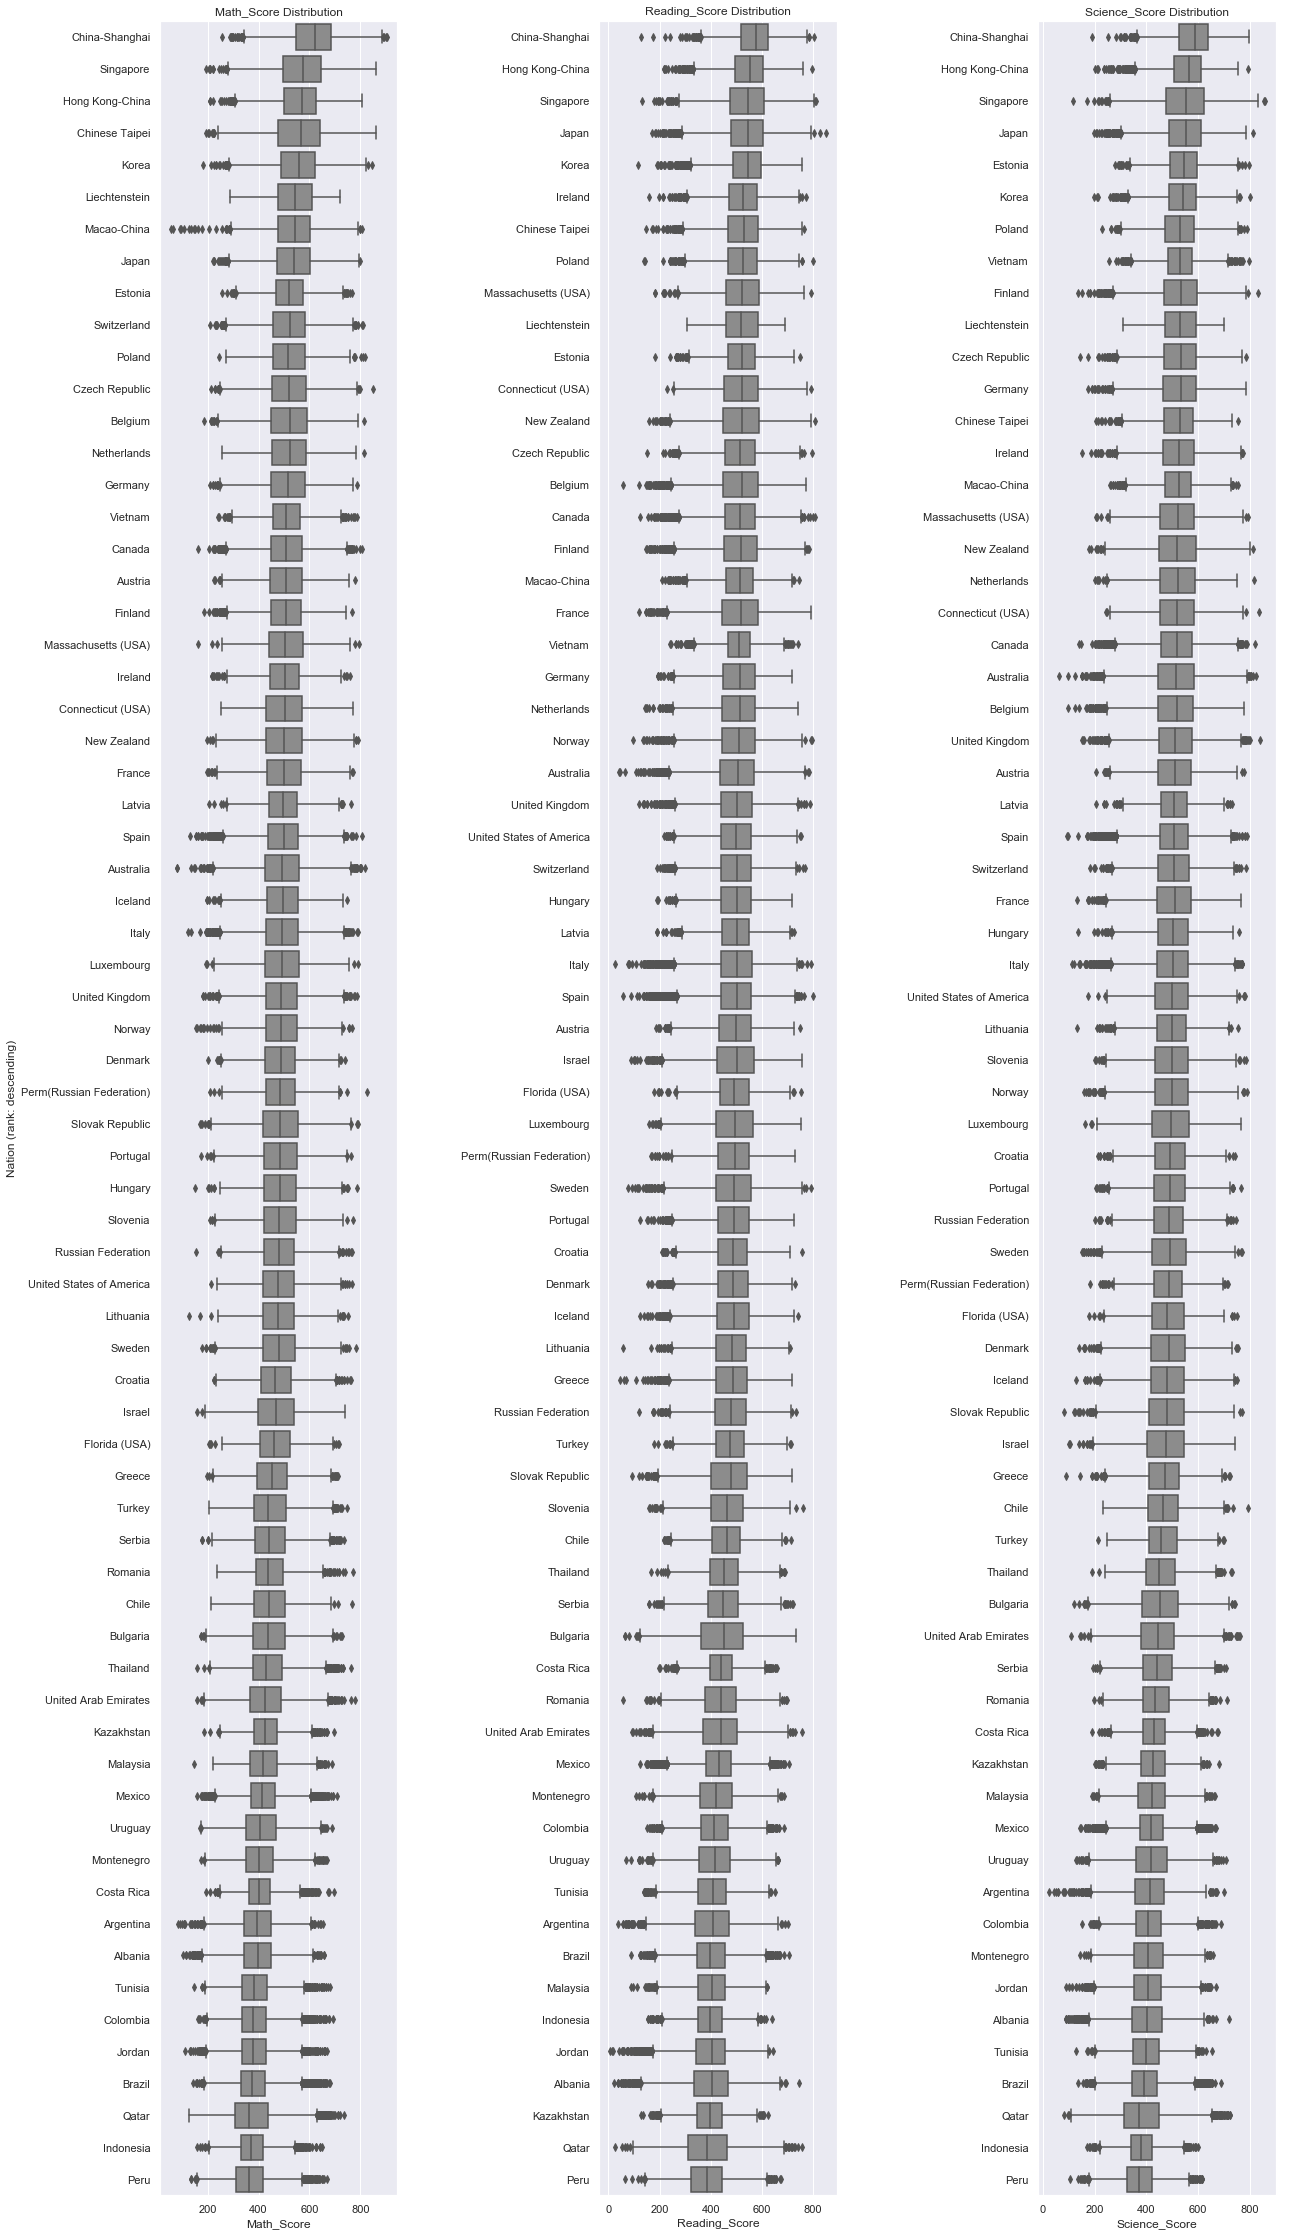

In [54]:
# Box and Whisker Plot displaying the Top 10 ranking for each repective category (top-down) 
plt.suptitle("PISA's Math, Reading and Science Scores Top-down Rankings", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
plt.subplots_adjust(wspace = 0.85) 

math_score_country_order = df.groupby('CNT')['Math_Score'].mean().sort_values(ascending = False).head(10)
reading_score_country_order = df.groupby('CNT')['Reading_Score'].mean().sort_values(ascending = False).head(10)
science_score_country_order = df.groupby('CNT')['Science_Score'].mean().sort_values(ascending = False).head(10)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math_Score'], y = df['CNT'], order = math_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Math_Score Distribution');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading_Score'], y = df['CNT'], order = reading_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Reading_Score Distribution');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science_Score'], y = df['CNT'], order = science_score_country_order.index, color = sb.color_palette()[7]);
plt.ylabel('Nation (rank: descending)');
plt.title('Science_Score Distribution');
plt.tight_layout();

These Box and Whisker plots also represent the global, PISA-score dominance of Asia-Pacific: Math, five out of the top five; Reading, five out of the top five ; Science, four out of the top five (by just beating South Korea, way to go Estonia!) which again, by any measure, is impressive.

All told, 93% is of the top rankings in these respective categories are Asia-Pacific nations! 

What are the highest, global PISA (Math, Reading and Science) results by age?

In [40]:
# Set-up an inquiry regarding the highest Math, Reading and Science results by age
top_math_and_reading_score = df[(df['Math_Score'] >= 800) & (df['Reading_Score'] >= 800)]['CNT'].value_counts()
top_math_and_science_score = df[(df['Math_Score'] >= 800) & (df['Science_Score'] >= 800)]['CNT'].value_counts()
top_reading_and_science_score = df[(df['Reading_Score'] >= 800) & (df['Science_Score'] >= 800)]['CNT'].value_counts()

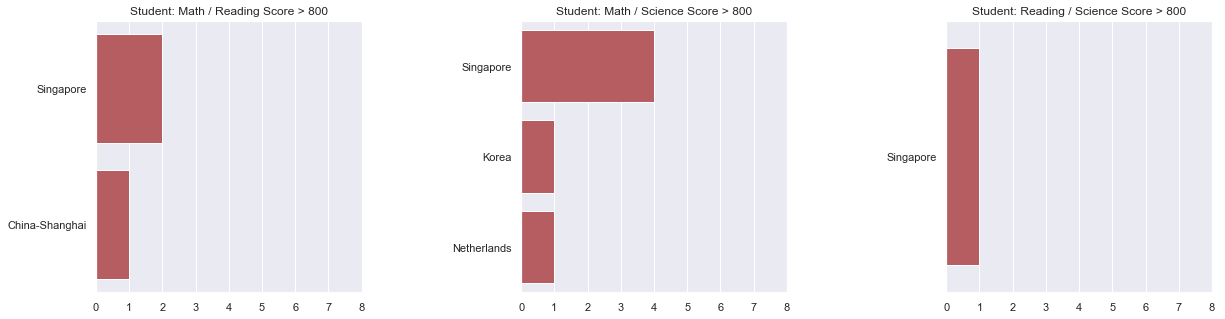

In [55]:
# Display the top Math, Reading and Science scores of above 800 globally by nation 
plt.suptitle("PISA's Top, Global Math, Reading and Science Scores of above 800", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
plt.subplots_adjust(wspace = 0.6) 
x_lim_max = top_math_and_science_score.values[0] 
plt.subplot(1, 3, 1)
sb.barplot(y = top_math_and_reading_score.index, x = top_math_and_reading_score.values, color = sb.color_palette()[3])
plt.title('Student: Math / Reading Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = top_math_and_science_score.index, x = top_math_and_science_score.values, color = sb.color_palette()[3])
plt.title('Student: Math / Science Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = top_reading_and_science_score.index, x = top_reading_and_science_score.values, color = sb.color_palette()[3])
plt.title('Student: Reading / Science Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));
plt.tight_layout();

These graphs also represent the top-global, PISA score dominance of Asia-Pacific: Math, Singapore / Shanghai; Reading, Singapore / South Korea / Holland (way to go!), and, Science, Singapore, standing along, which again, by any measure, is impressive.

Moreover, congrats to Singapore (it is clearly the most dominant in global math, reading and science PISA scores).

## Multivariate Exploration

What are the overall PISA (Math, Reading and Science) results by correlation?

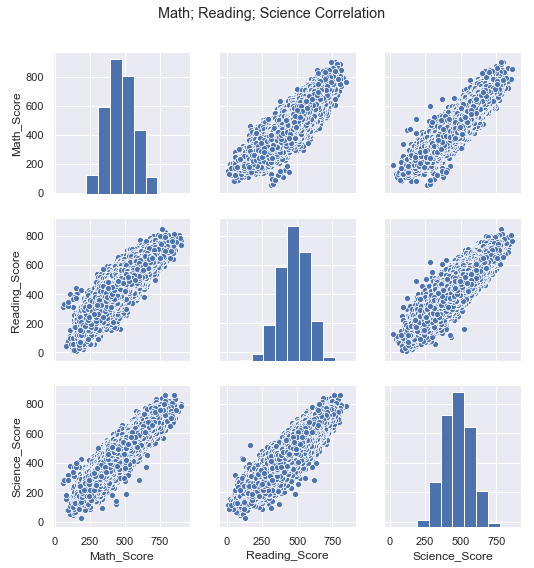

In [51]:
grid = sb.pairplot(data = df, vars=["Math_Score", "Reading_Score", "Science_Score"]);
grid.fig.suptitle("Math; Reading; Science Correlation", y = 1.05);

As evidenced by previous graphs, there is a positive correlation and inter-relationship between the testing outcomes and any given pair of the three variables depicting PISA-scores in math, reading and science.

In [59]:
top_math_and_reading_score = df[(df['Math_Score'] >= 800) & (df['Reading_Score'] >= 800)]['AGE'].value_counts()
top_math_and_science_score = df[(df['Math_Score'] >= 800) & (df['Science_Score'] >= 800)]['AGE'].value_counts()
top_reading_and_science_score = df[(df['Reading_Score'] >= 800) & (df['Science_Score'] >= 800)]['AGE'].value_counts()

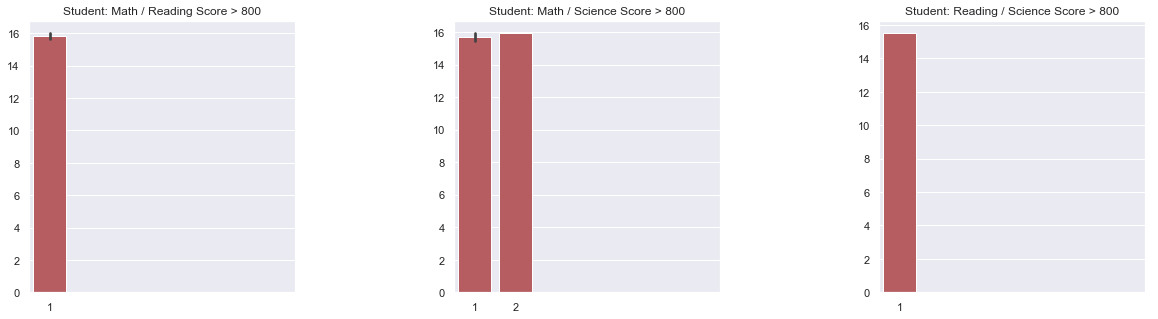

In [60]:
# Display the top Math, Reading and Science scores of above 800 globally by age 
plt.figure(figsize=[14.70, 8.27])
plt.subplots_adjust(wspace = 0.6) 
x_lim_max = top_math_and_science_score.values[0] 
plt.subplot(1, 3, 1)
sb.barplot(y = top_math_and_reading_score.index, x = top_math_and_reading_score.values, color = sb.color_palette()[3])
plt.title('Student: Math / Reading Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));

plt.subplot(1, 3, 2)
sb.barplot(y = top_math_and_science_score.index, x = top_math_and_science_score.values, color = sb.color_palette()[3])
plt.title('Student: Math / Science Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = top_reading_and_science_score.index, x = top_reading_and_science_score.values, color = sb.color_palette()[3])
plt.title('Student: Reading / Science Score > 800');
plt.ylabel('Nation (rank: descending)'); 
plt.xlabel('Total Students');
plt.xticks(np.arange(0, x_lim_max + 5, 1));
plt.tight_layout();

This is another exploratory chart for my own analysis.

What is the PISA-population (highest to lowest) of students by nation?

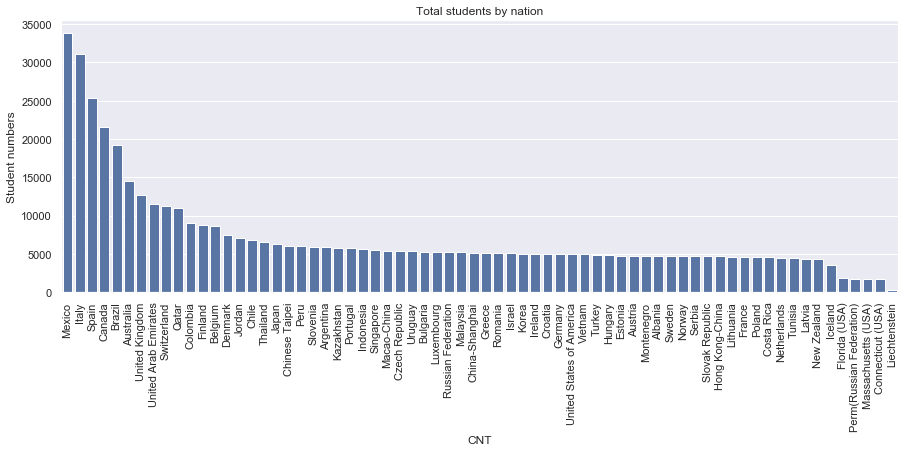

In [74]:
# Graphical PISA-population (highest to lowest) of students by nation 
plt.suptitle("PISA student-population (highest to lowest) by Nation", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'CNT', color = base_color, order=df['CNT'].value_counts().index)
plt.title('Total students by nation')
plt.xticks(rotation='vertical');
plt.ylabel('Student numbers');
plt.tight_layout();

This is another exploratory chart for my own analysis.

What are the age-based, average student-score of PISA participants by nation?

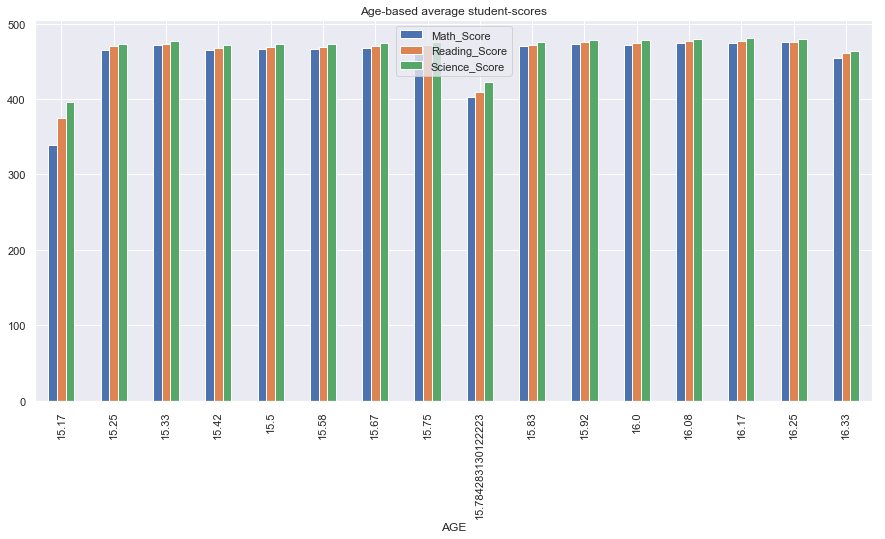

In [93]:
# Average categorical scores based on age
res = df.groupby(['AGE']).median()[['Math_Score', 'Reading_Score', 'Science_Score']]
ax = res.plot.bar(figsize=(15,7));
plt.title('Age-based average student-scores');
plt.xticks(rotation='vertical');
plt.ylabel('Score range');
plt.tight_layout();

This is another exploratory chart for my own analysis.

What are the age-based, average student-score of PISA participants by (binary)-gender?

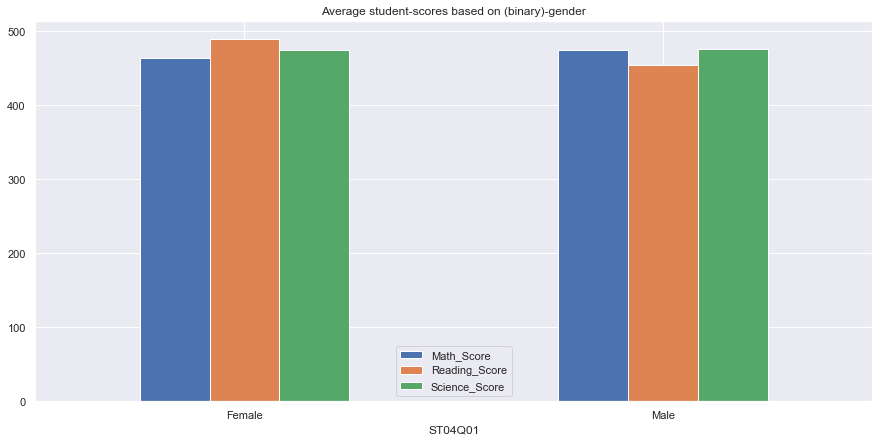

In [91]:
# Average student-scores based on (binary)-gender
plt.suptitle("PISA's Average Average Scores based on binary-gender", fontsize = 14, weight = "bold", y = 1.04)
plt.figure(figsize=[14.70, 8.27])
res = df.groupby(['ST04Q01']).mean()[['Math_Score', 'Reading_Score', 'Science_Score']]
ax = res.plot.bar(figsize=(15,7));
plt.title('Average student-scores based on (binary)-gender');
plt.xticks(rotation='horizontal');
plt.ylabel('Student scores');
plt.xlabel('Reported Gender (ST04Q01)');
plt.tight_layout();

This chart and further analysis in these areas could prove useful for curriculum development.

What are some random, PISA (Math, Reading and Science) student score distributions by nation?

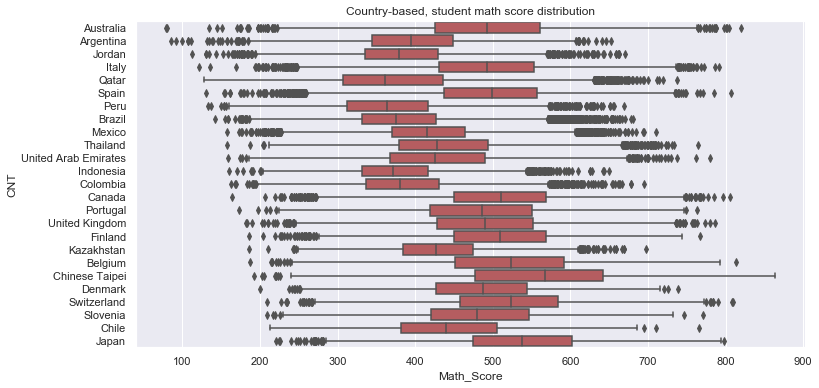

In [85]:
plt.figure(figsize=[14.70, 8.27])
res = df['CNT'].value_counts()
df_sorted = df.sort_values(by='Math_Score')
for i in range(1,44):
    df_sorted = df_sorted[df_sorted['CNT'] != res.keys()[res.size-i]]
sb.boxplot(x = df_sorted['Math_Score'], y = df_sorted['CNT'], color=sb.color_palette()[3]);
plt.title('Random country-based, student math score distribution');
plt.tight_layout();

This is another exploratory chart for my own analysis.

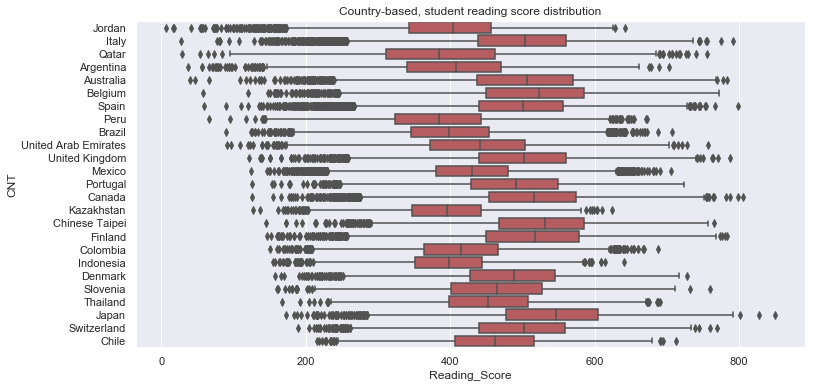

In [86]:
plt.figure(figsize=[14.70, 8.27])
res = df['CNT'].value_counts()
df_sorted = df.sort_values(by='Reading_Score')
for i in range(1,44):
    df_sorted = df_sorted[df_sorted['CNT'] != res.keys()[res.size-i]]
sb.boxplot(x = df_sorted['Reading_Score'], y = df_sorted['CNT'], color=sb.color_palette()[3]);
plt.title('Random country-based, student reading score distribution');
plt.tight_layout();

This is another exploratory chart for my own analysis.

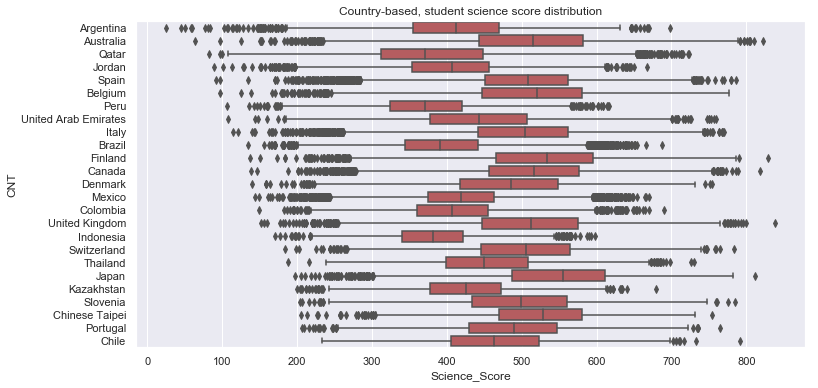

In [87]:
plt.figure(figsize=[14.70, 8.27])
res = df['CNT'].value_counts()
df_sorted = df.sort_values(by='Science_Score')
for i in range(1,44):
    df_sorted = df_sorted[df_sorted['CNT'] != res.keys()[res.size-i]]
sb.boxplot(x = df_sorted['Science_Score'], y = df_sorted['CNT'], color=sb.color_palette()[3]);
plt.title('Random country-based, student science score distribution');
plt.tight_layout();

This is another exploratory chart for my own analysis.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Again, the strength of many of the Asia-Pacific nations (in particular) Singapore is impressive. 

### Were there any interesting or surprising interactions between features?

Conversely, while unsurprised regarding America's global ranking, it is interesting to see the difference between Florida and Massachusetts as outliers within the nation's overall rankings. This could be attributed to numerous factors ranging from these states' GDP to taxation to access to education which is generally, more readily available as a result of higher income levels.

References

http://www.oecd.org/pisa/

https://stackoverflow.com

https://www.udacity.com